In [1]:
import torch
import random
import numpy as np


np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
random.seed(16)
random.randint(0,10)

5

In [3]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :2], 
    wine.target, 
    test_size=0.3, 
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [11]:
class WineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(WineNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
#         self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
#         self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
#         x = self.fc2(x)
#         x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
wine_net = WineNet(5)

In [12]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(wine_net.parameters(), 
                             lr=1.0e-3)

In [7]:
np.random.permutation(5)

array([2, 0, 1, 4, 3])

In [13]:
batch_size = 10

for epoch in range(5000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = wine_net.forward(x_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        test_preds = wine_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

tensor(0.2407)
tensor(0.5185)
tensor(0.4815)
tensor(0.4815)
tensor(0.6296)
tensor(0.6296)
tensor(0.7222)
tensor(0.7778)
tensor(0.7778)
tensor(0.7593)
tensor(0.8148)
tensor(0.7963)
tensor(0.7963)
tensor(0.8333)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8704)
tensor(0.8704)
tensor(0.8704)
tensor(0.8704)
tensor(0.8704)
tensor(0.8704)
tensor(0.8704)
tensor(0.8704)
tensor(0.8704)
tensor(0.8704)
tensor(0.8704)
tensor(0.8704)
tensor(0.8704)
tensor(0.8704)
tensor(0.8889)
tensor(0.8889)
tensor(0.8889)
tensor(0.8889)
tensor(0.8889)
tensor(0.8889)
tensor(0.8889)
tensor(0.9074)
tensor(0.8889)
tensor(0.8889)
tensor(0.8704)
tensor(0.9074)
tensor(0.8704)


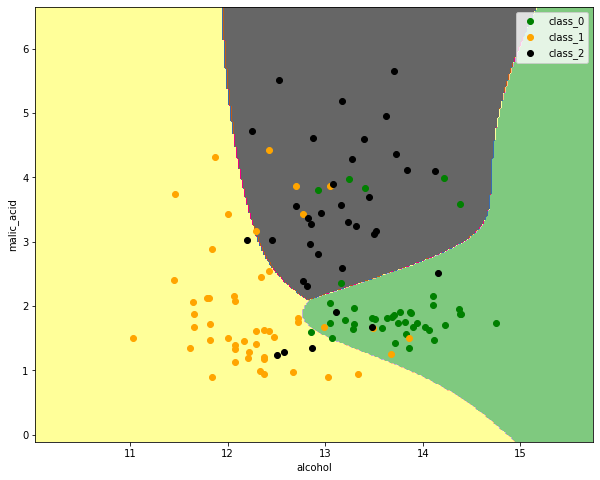

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(X_train[indexes, 0], 
                X_train[indexes, 1], 
                c=color, 
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()

## Padding

In [17]:
import torch.nn.functional as F

In [19]:
# Создаем входной массив из двух изображений RGB 3*3
input_images = torch.tensor(
      [[[[0,  1,  2],
         [3,  4,  5],
         [6,  7,  8]],

        [[9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]]])


def get_padding2d(input_images):
    padded_images = F.pad(input=input_images, pad = (1,1,1,1), mode='constant', value=0)
    return padded_images

get_padding2d(input_images)

tensor([[[[ 0,  0,  0,  0,  0],
          [ 0,  0,  1,  2,  0],
          [ 0,  3,  4,  5,  0],
          [ 0,  6,  7,  8,  0],
          [ 0,  0,  0,  0,  0]],

         [[ 0,  0,  0,  0,  0],
          [ 0,  9, 10, 11,  0],
          [ 0, 12, 13, 14,  0],
          [ 0, 15, 16, 17,  0],
          [ 0,  0,  0,  0,  0]],

         [[ 0,  0,  0,  0,  0],
          [ 0, 18, 19, 20,  0],
          [ 0, 21, 22, 23,  0],
          [ 0, 24, 25, 26,  0],
          [ 0,  0,  0,  0,  0]]],


        [[[ 0,  0,  0,  0,  0],
          [ 0, 27, 28, 29,  0],
          [ 0, 30, 31, 32,  0],
          [ 0, 33, 34, 35,  0],
          [ 0,  0,  0,  0,  0]],

         [[ 0,  0,  0,  0,  0],
          [ 0, 36, 37, 38,  0],
          [ 0, 39, 40, 41,  0],
          [ 0, 42, 43, 44,  0],
          [ 0,  0,  0,  0,  0]],

         [[ 0,  0,  0,  0,  0],
          [ 0, 45, 46, 47,  0],
          [ 0, 48, 49, 50,  0],
          [ 0, 51, 52, 53,  0],
          [ 0,  0,  0,  0,  0]]]])

In [15]:
?torch.nn.functional.pad

In [21]:
t4d = torch.empty(3, 3, 4, 2)
>>> p1d = (1, 1) # pad last dim by 1 on each side
>>> out = F.pad(t4d, p1d, "constant", 0)  # effectively zero padding
>>> print(out.size())
out

torch.Size([3, 3, 4, 4])


tensor([[[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]],


        [[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]],


        [[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],


In [ ]:
torch.Size([3, 3, 4, 4])
p2d = (1, 1, 2, 2) # pad last dim by (1, 1) and 2nd to last by (2, 2)
out = F.pad(t4d, p2d, "constant", 0)
print(out.size())
torch.Size([3, 3, 8, 4])
t4d = torch.empty(3, 3, 4, 2)
p3d = (0, 1, 2, 1, 3, 3) # pad by (0, 1), (2, 1), and (3, 3)
out = F.pad(t4d, p3d, "constant", 0)
print(out.size())
torch.Size([3, 9, 7, 3])